<a href="https://colab.research.google.com/github/sjoerdteunisse/ML2-Workshop-project/blob/main/Countries_of_the_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Countries of the world ML project

## Import dependecies

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [25]:
verbose_graphs = False

## Load data

In [26]:
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/Countries-Of-The-World-data/countries%20of%20the%20world.csv

--2020-09-25 08:47:52--  https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/Countries-Of-The-World-data/countries%20of%20the%20world.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38303 (37K) [text/plain]
Saving to: ‘countries of the world.csv.1’

countries of the wo 100%[===================>]  37.41K  --.-KB/s    in 0.009s  

2020-09-25 08:47:52 (4.08 MB/s) - ‘countries of the world.csv.1’ saved [38303/38303]



In [27]:
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2015.csv
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2016.csv
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2017.csv
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2018.csv
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2019.csv

--2020-09-25 08:47:52--  https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2015.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16557 (16K) [text/plain]
Saving to: ‘WH-2015.csv.1’

WH-2015.csv.1       100%[===================>]  16.17K  --.-KB/s    in 0.006s  

2020-09-25 08:47:52 (2.50 MB/s) - ‘WH-2015.csv.1’ saved [16557/16557]

--2020-09-25 08:47:53--  https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2016.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting respon

In [28]:
raw_cofw_df = pd.read_csv("/content/countries of the world.csv", decimal=',')

In [29]:
raw_whco_2019_df = pd.read_csv("/content/WH-2019.csv", decimal=',')


In [30]:
raw_cofw_df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [31]:
raw_cofw_df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [32]:
raw_cofw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [33]:
raw_data = raw_cofw_df.iloc[:,:]

In [34]:
raw_data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


# Data Exploration

## Print all numerical data


In [35]:
numerical_var = raw_data.select_dtypes(include=[np.number])
numerical_var.dtypes

Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

## Print all categorical data


In [36]:
categorical_var = raw_data.select_dtypes(exclude=[np.number])
categorical_var.dtypes

Country    object
Region     object
dtype: object

## Check unusable data values

In [37]:
print(pd.isnull(raw_data).sum())

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


## Plot correlations from feature to feature

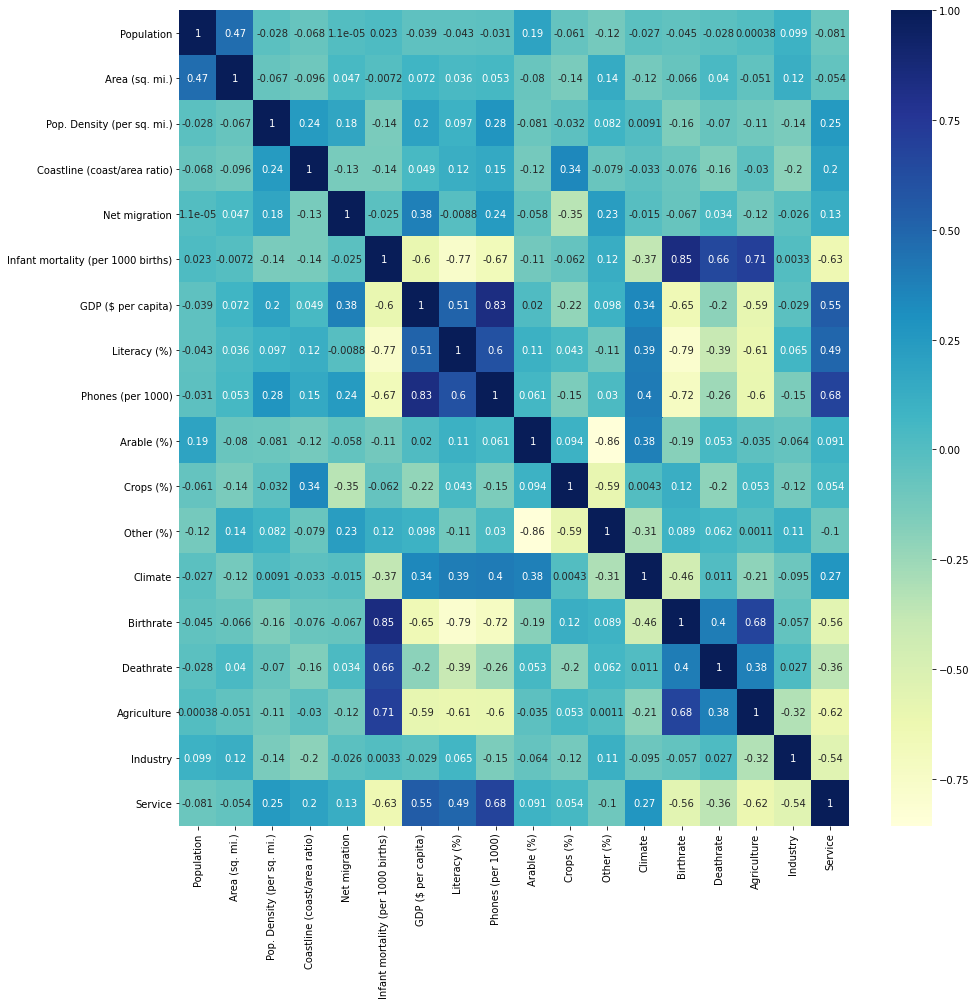

In [38]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(raw_data.corr(), cmap="YlGnBu", annot=True);

## Plot correlations of feature to region

In [39]:
if (verbose_graphs):
  x = raw_cofw_df.loc[:,["Region", "Infant mortality (per 1000 births)", "Literacy (%)", "Phones (per 1000)", "Arable (%)", "Crops (%)", "Other (%)", "Climate", "Birthrate", "Deathrate", "Agriculture", "Industry", "Service"]]
  sns.pairplot(x,hue="Region",palette="inferno")

In [40]:
if (verbose_graphs): 
  data = dict(type='choropleth',
  locations = raw_data.Country,
  locationmode = 'country names', z = raw_data.Population,
  text = raw_data.Country, colorbar = {'title':'Population'},
  colorscale = 'Blackbody', reversescale = True)
  layout = dict(title='Population per country',
  geo = dict(showframe=False,projection={'type':'natural earth'}))
  choromap = go.Figure(data = [data],layout = layout)
  iplot(choromap,validate=False)  

# Feature engeniering

In [41]:
len(raw_data["Region"].unique())

11

## Feature selection

In [42]:
#features = ["Population", "Area (sq. mi.)", "Pop. Density (per sq. mi.)", "Coastline (coast/area ratio)", "Net migration", "Infant mortality (per 1000 births)", "Literacy (%)", "Phones (per 1000)", "Arable (%)", "Crops (%)", "Other (%)", "Climate", "Birthrate", "Deathrate", "Agriculture", "Industry", "Service"]
features = ["Infant mortality (per 1000 births)", "Birthrate", "Deathrate", "Agriculture", "Service", "Industry", "Literacy (%)"]

prediction_feature = ["Region"]

## Selected feature correlation

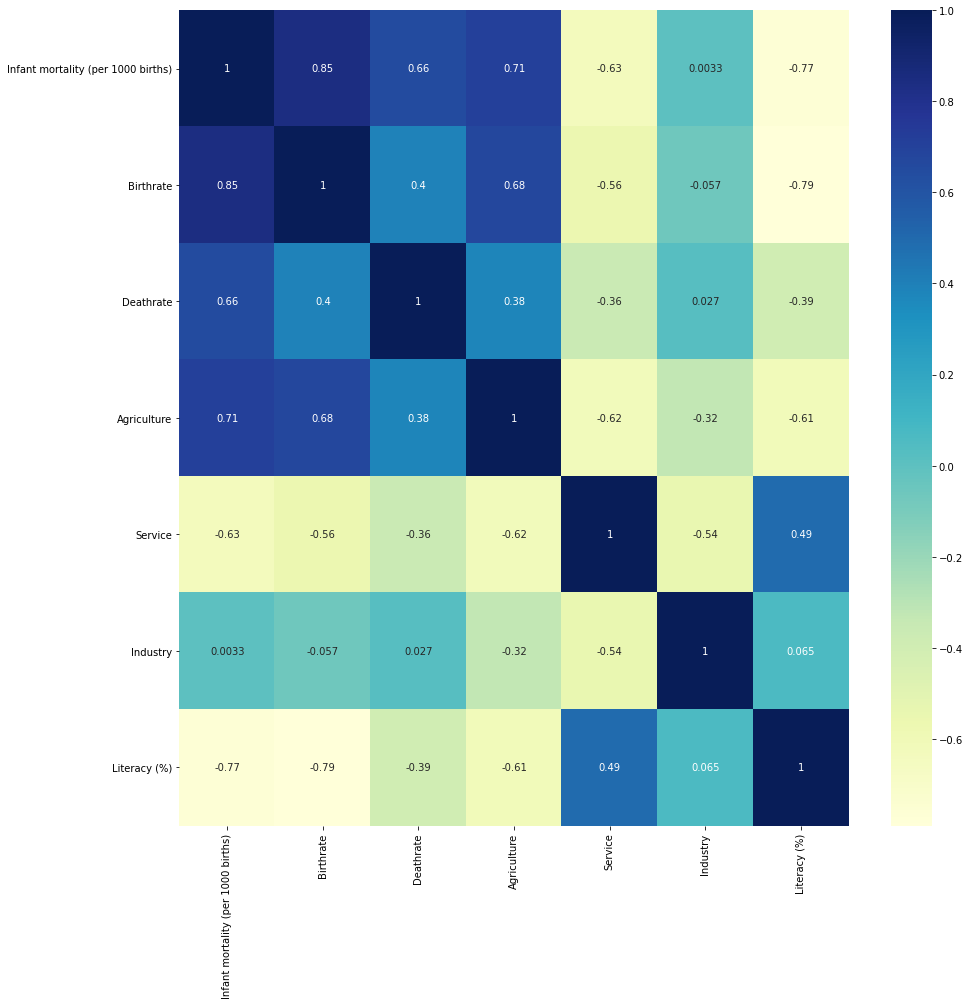

In [43]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(raw_data[features].corr(), cmap="YlGnBu", annot=True);

## Label encoding

In [47]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

le = LabelEncoder()
Y_train = le.fit_transform(raw_data["Region"])
dummy_y = to_categorical(Y_train).astype(float)

## Model accuracy & loss plot

In [45]:
def plot_loss_acc():
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  # "Loss"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

## Model training

Epoch 1/250
3/3 [==============================] - 0s 61ms/step - loss: 8.4490 - accuracy: 0.0657 - val_loss: 8.3173 - val_accuracy: 0.0339
Epoch 2/250
3/3 [==============================] - 0s 7ms/step - loss: 7.8859 - accuracy: 0.0657 - val_loss: 7.8084 - val_accuracy: 0.0339
Epoch 3/250
3/3 [==============================] - 0s 7ms/step - loss: 7.3761 - accuracy: 0.0730 - val_loss: 7.3263 - val_accuracy: 0.0169
Epoch 4/250
3/3 [==============================] - 0s 7ms/step - loss: 6.9056 - accuracy: 0.0730 - val_loss: 6.8750 - val_accuracy: 0.0339
Epoch 5/250
3/3 [==============================] - 0s 7ms/step - loss: 6.4690 - accuracy: 0.0803 - val_loss: 6.4634 - val_accuracy: 0.0339
Epoch 6/250
3/3 [==============================] - 0s 7ms/step - loss: 6.0739 - accuracy: 0.0803 - val_loss: 6.0909 - val_accuracy: 0.0339
Epoch 7/250
3/3 [==============================] - 0s 7ms/step - loss: 5.7078 - accuracy: 0.0803 - val_loss: 5.7538 - val_accuracy: 0.0339
Epoch 8/250
3/3 [=========

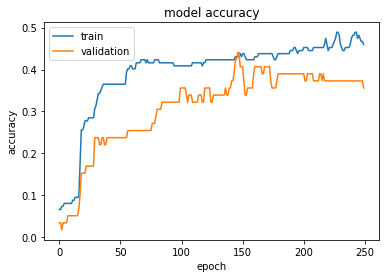

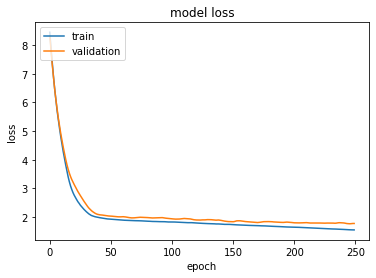

In [48]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
raw_data.dropna(subset=features, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(raw_data[features], dummy_y, test_size=0.3, random_state=41)

model.add(Dense(7, input_dim=len(features),  activation="relu"))

model.add(Dense(20, activation="relu"))
model.add(Dense(20, activation="relu"))

model.add(Dense(11, activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs= 250, batch_size=64, shuffle=True, validation_data=(X_test, y_test))

plot_loss_acc()

In [ ]:
model = Sequential()
raw_data.dropna(subset=features, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(raw_data[features], dummy_y, test_size=0.3, random_state=41)


model.add(Dense(11, activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs= 250, batch_size=64, shuffle=True, validation_data=(X_test, y_test))

plot_loss_acc()

# Comparison

## Decision Tree

In [49]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#X = features
X = ["Infant mortality (per 1000 births)", "Birthrate", "Deathrate", "Agriculture", "Service", "Industry", "Literacy (%)"]
y = prediction_feature
X_train, X_test, y_train, y_test = train_test_split(raw_data[features], dummy_y, test_size=0.3, random_state=41) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=15, random_state=87643884)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy at depth "+str(15)+":",metrics.accuracy_score(y_test, y_pred))

Accuracy at depth 15: 0.5423728813559322


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



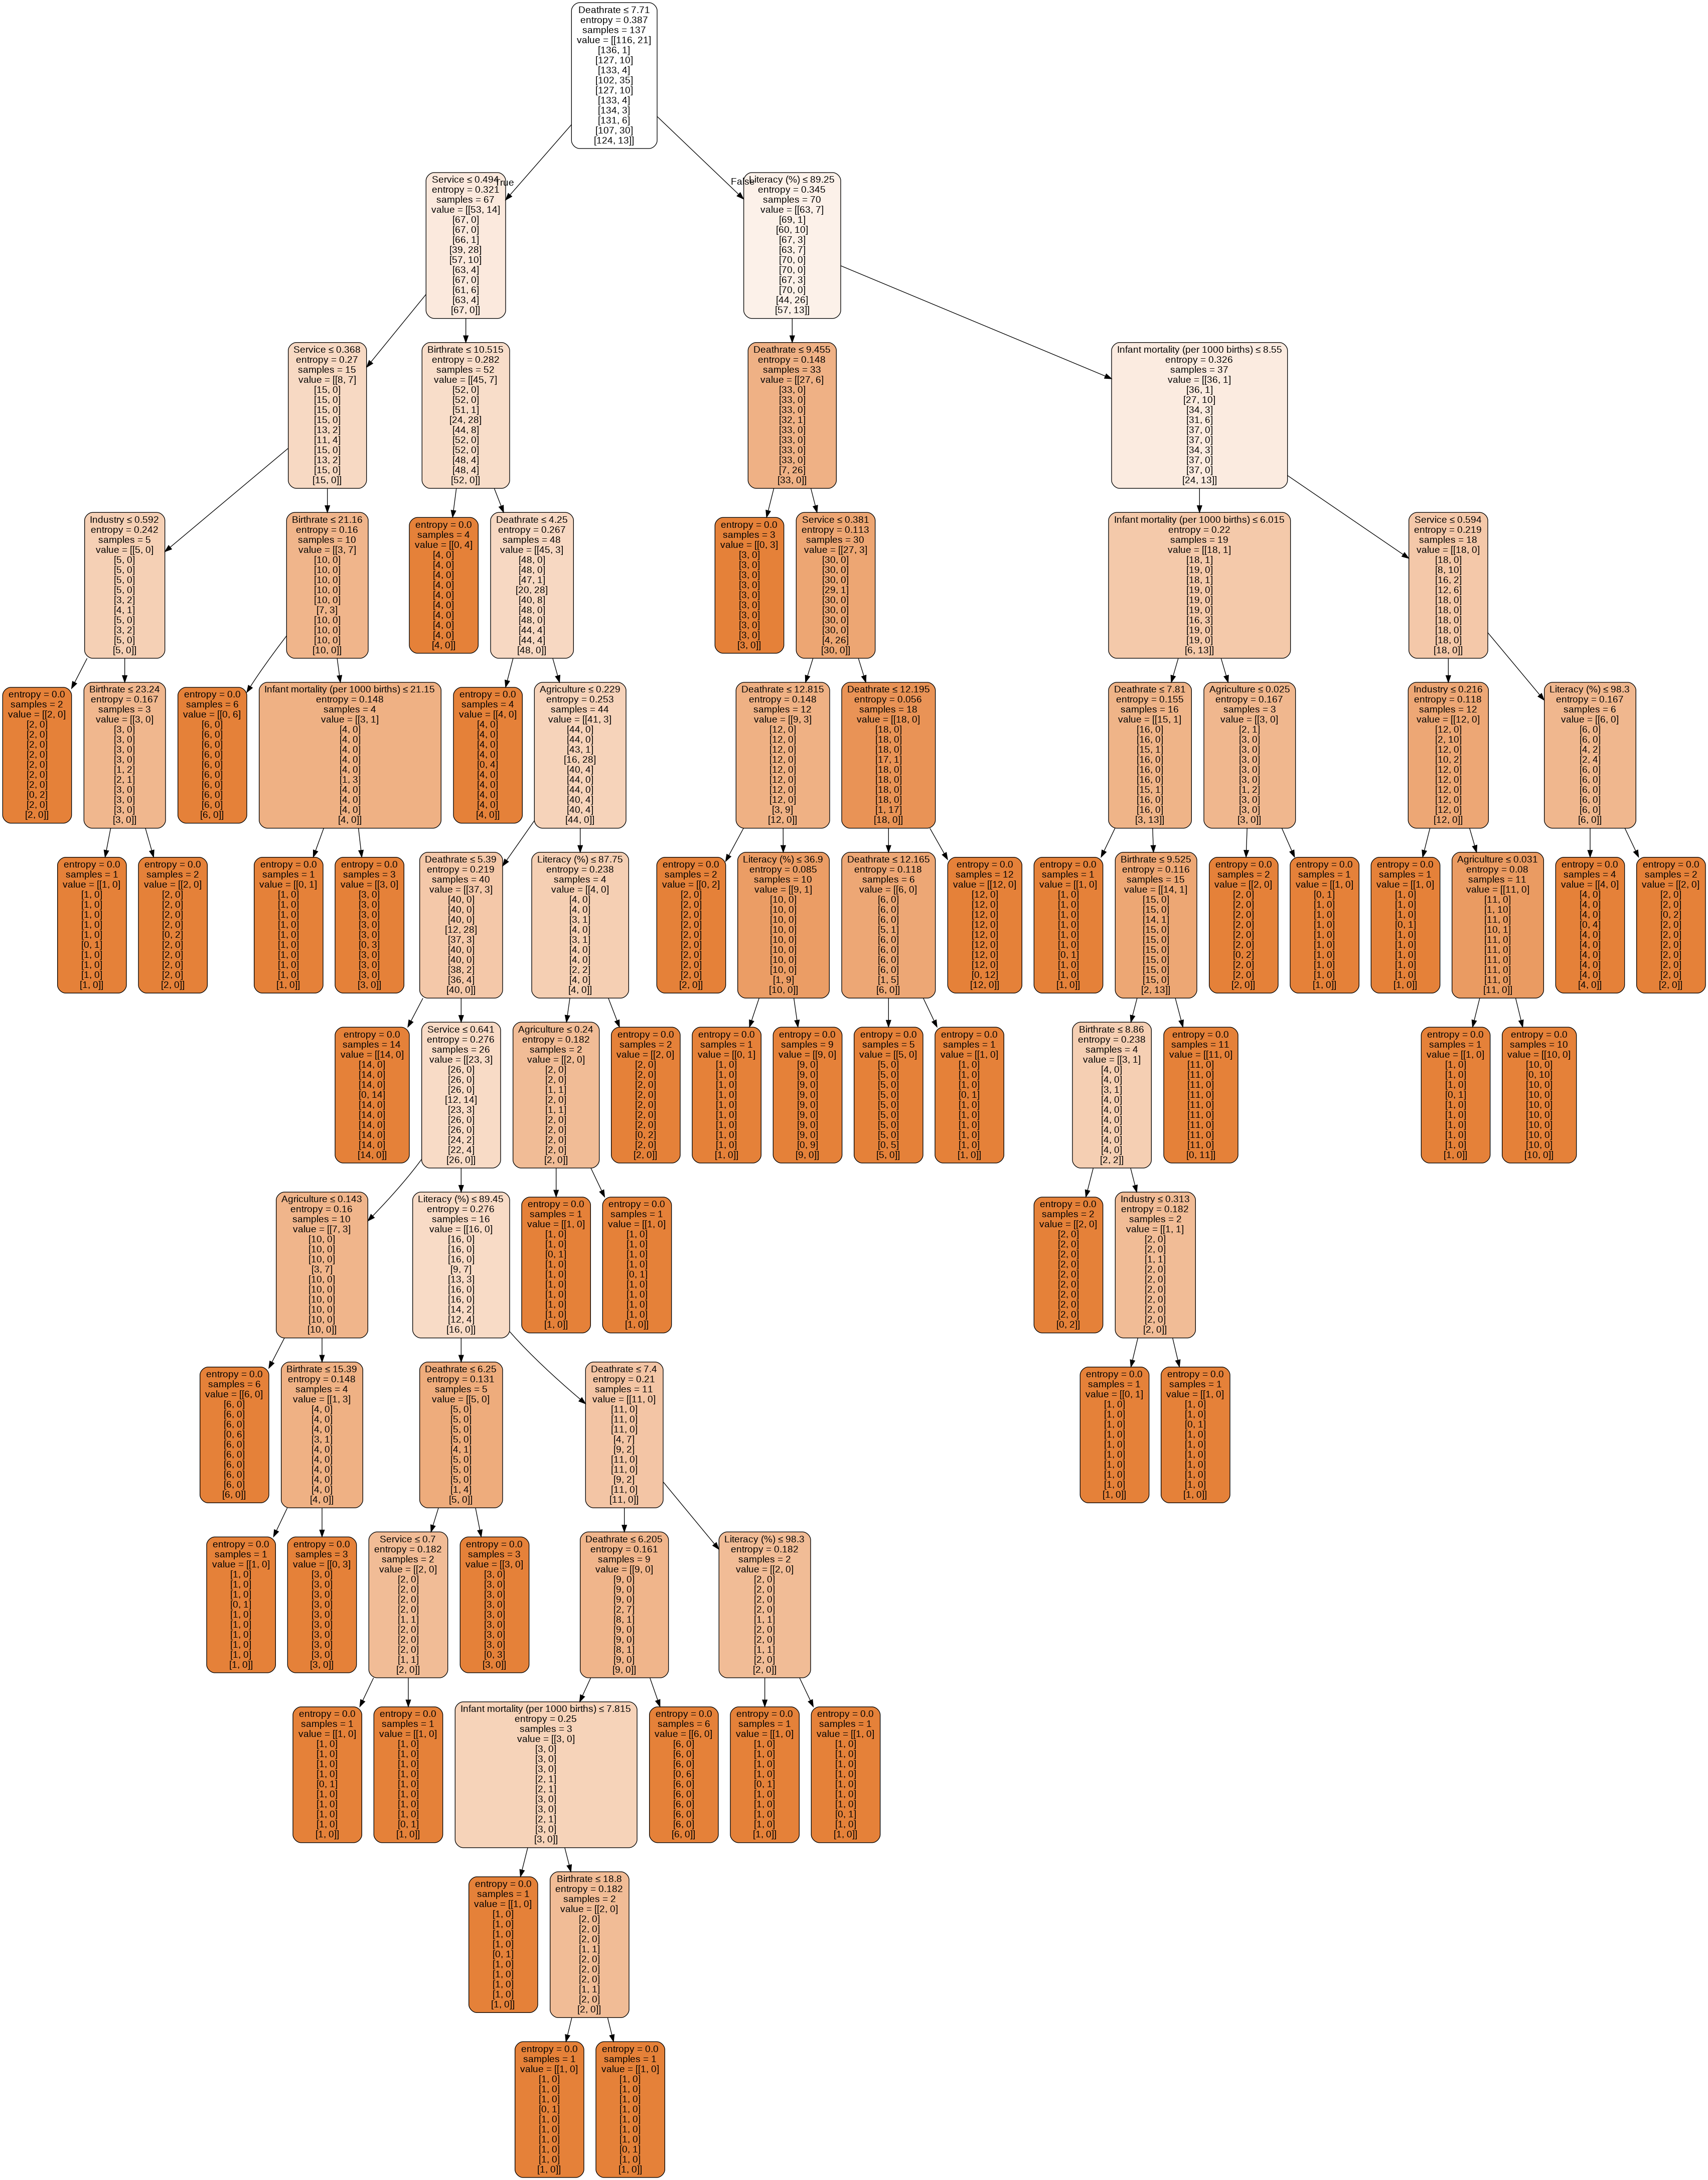

In [50]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Random Forest

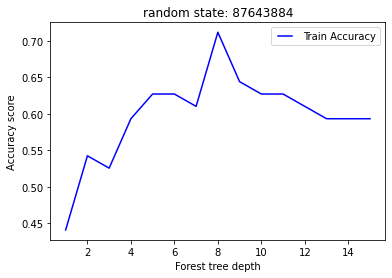

0.711864406779661


In [51]:
from sklearn.ensemble import RandomForestClassifier
from numpy import random

# forest=RandomForestClassifier(n_estimators=100)
X = ["Infant mortality (per 1000 births)", "Birthrate", "Deathrate", "Agriculture", "Service", "Industry", "Literacy (%)"]
y = prediction_feature
X_train, X_test, y_train, y_test = train_test_split(raw_data[features], raw_data["Region"], test_size=0.3, random_state=41) # 70% training and 30% test

max_depths = np.linspace(1, 15, 15, endpoint=True)

# highest_train_result = 0
# while highest_train_result < 70:
    
train_results = []

# random_state = random.randint(low = 0, high = (np.power(2,32)), size = 1)[0] 
# print(random_state)

for max_depth in max_depths:
  #87643884 random state 71% accuracy
  random_state = 87643884
  rf = RandomForestClassifier(max_depth=max_depth, n_estimators=100, random_state=87643884 )
  rf.fit(X_train, y_train)

  y_pred=rf.predict(X_test)

  train_results.append(metrics.accuracy_score(y_test, y_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train Accuracy")
plt.title("random state: " + str(random_state))
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("Forest tree depth")
plt.show()

print(max(train_results))
highest_train_result = max(train_results)*100

